In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("predictive_maintenance.csv")

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [6]:
df = df.drop(["UDI","Product ID", "Failure Type"],axis=1)

In [7]:
df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

In [8]:
df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)

# Explorfatory Data Analysis

Target
0    9661
1     339
Name: count, dtype: int64


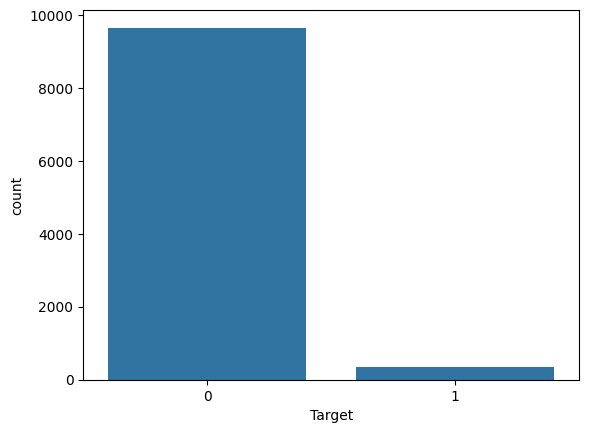

In [9]:
print(df['Target'].value_counts())
sns.countplot(x='Target', data=df);
plt.savefig("imbalance.png") ;

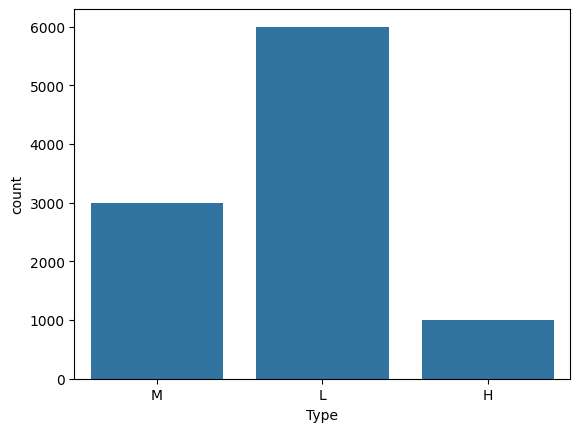

In [10]:
sns.countplot(x='Type', data=df);
plt.savefig("type.png") ;

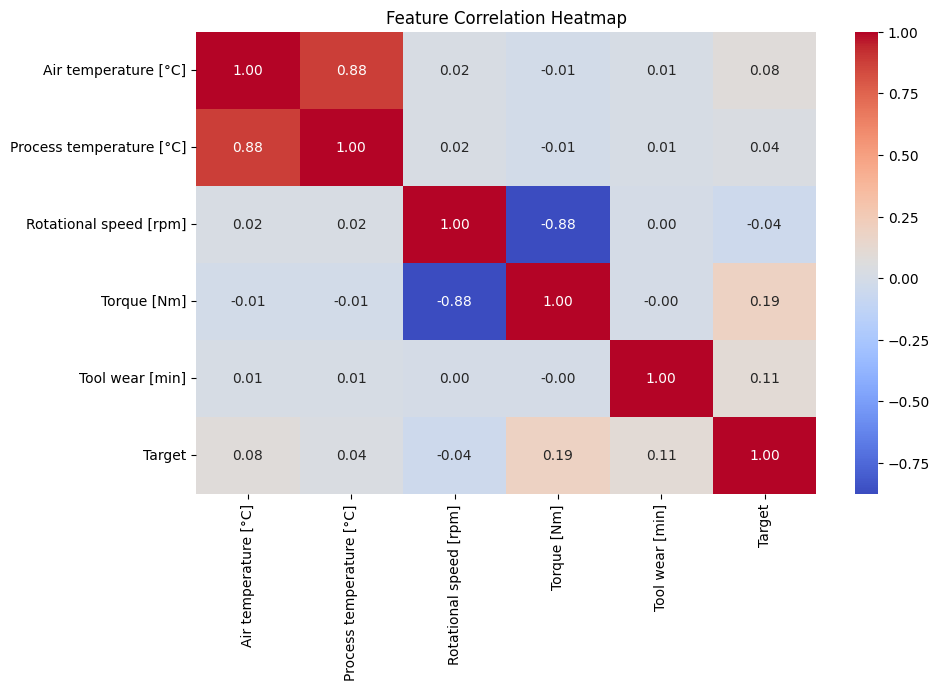

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.drop(["Type"],axis=1).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()
plt.savefig('heatmap.png')

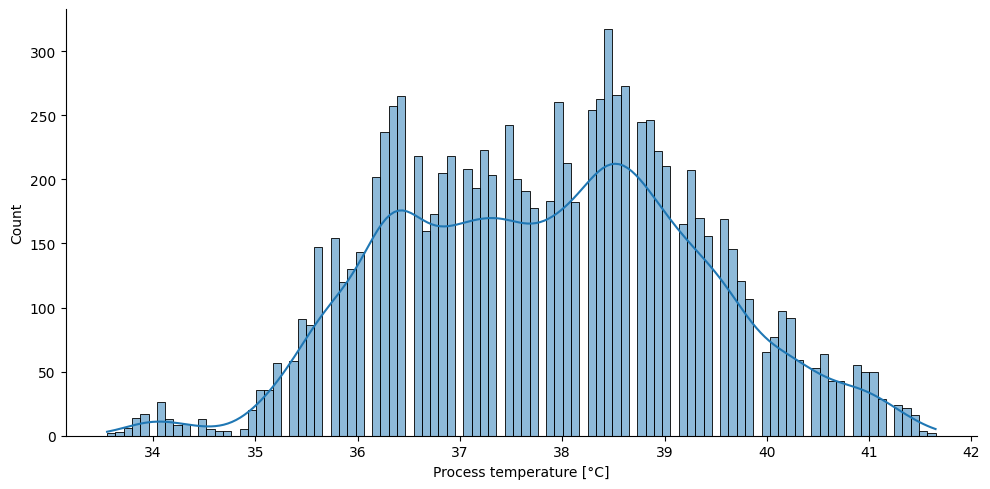

In [15]:
sns.displot(data=df, x="Process temperature [°C]", kde=True, bins = 100,aspect = 2);
plt.savefig('temperature.png')

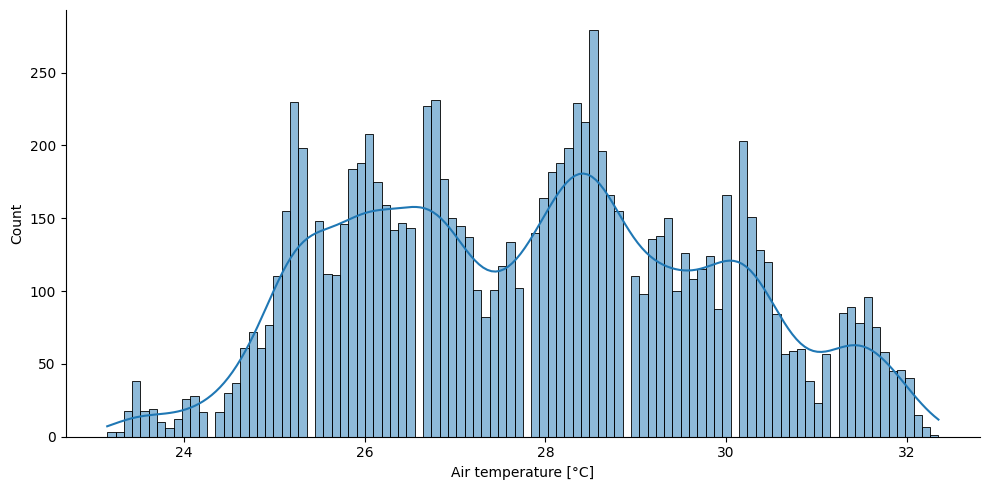

In [16]:
sns.displot(data=df, x="Air temperature [°C]", kde=True, bins = 100,aspect = 2);
plt.savefig('air.png')

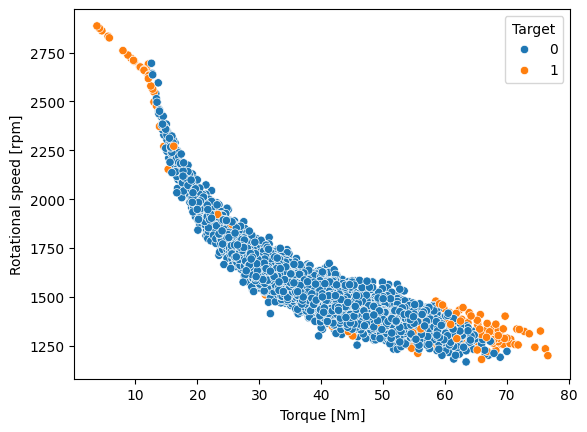

In [17]:
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target");

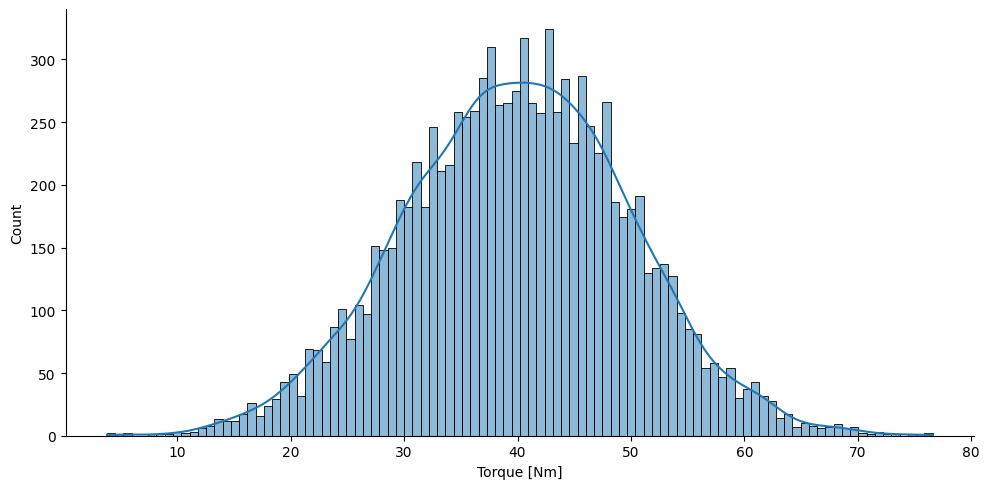

In [18]:
sns.displot(data=df, x="Torque [Nm]", kde=True, bins = 100,aspect = 2);

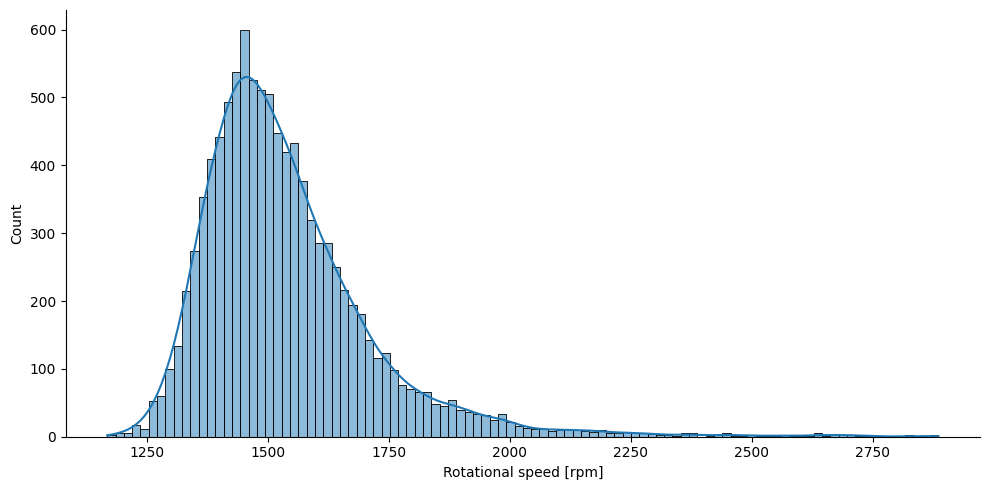

In [19]:
sns.displot(data=df, x="Rotational speed [rpm]", kde=True, bins = 100,aspect = 2);

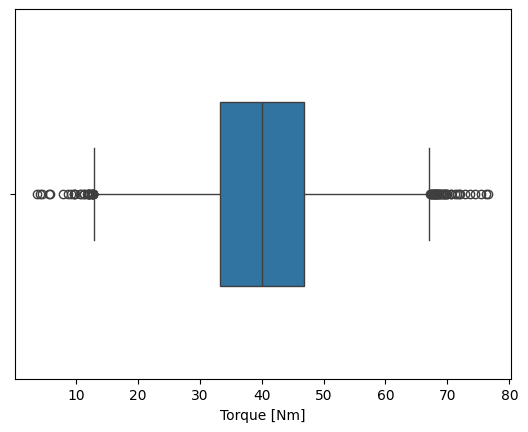

In [20]:
sns.boxplot(data=df, x="Torque [Nm]", width=0.5);

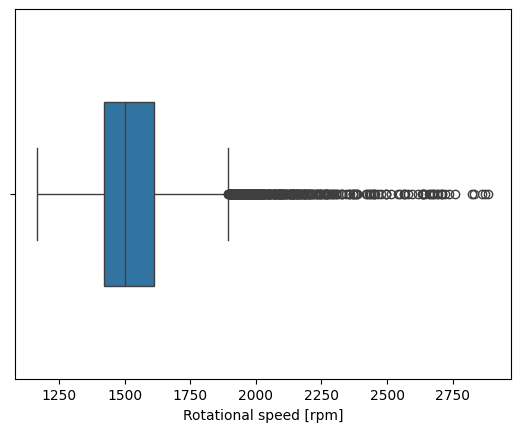

In [21]:
sns.boxplot(data=df, x="Rotational speed [rpm]", width=0.5);

# Preprocessing

In [22]:
df = pd.get_dummies(df, columns=['Type'], drop_first=True)

In [23]:
df.head()

,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_L,Type_M
0,25.95,36.45,1551,42.8,0,0,False,True
1,26.05,36.55,1408,46.3,3,0,True,False
2,25.95,36.35,1498,49.4,5,0,True,False
3,26.05,36.45,1433,39.5,7,0,True,False
4,26.05,36.55,1408,40.0,9,0,True,False


In [24]:
X = df.drop('Target', axis=1)
y = df['Target']

# Train/Test splits

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)         



# Training models

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}


for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.64      0.10      0.18        68

    accuracy                           0.97      2000
   macro avg       0.80      0.55      0.58      2000
weighted avg       0.96      0.97      0.96      2000

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1932
           1       0.88      0.53      0.66        68

    accuracy                           0.98      2000
   macro avg       0.93      0.76      0.83      2000
weighted avg       0.98      0.98      0.98      2000

=== SVM ===
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1932
           1       0.87      0.19      0.31        68

    accuracy                           0.97      2000
   macro avg       0.92      0.60      0.65      2000
weighted avg

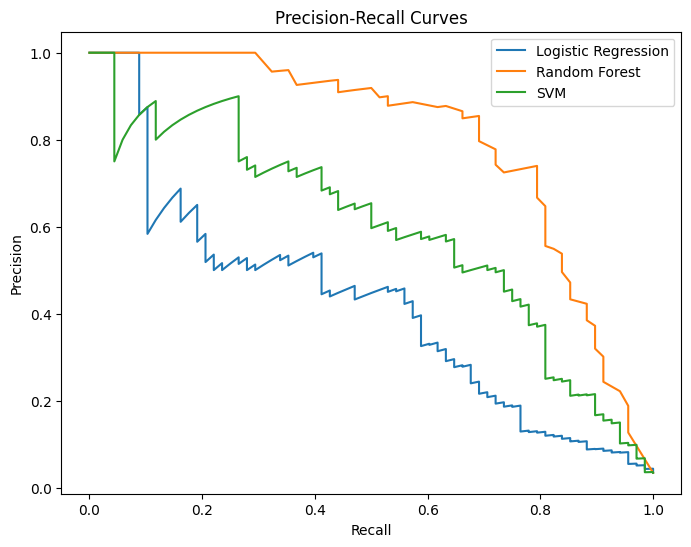

In [27]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(8,6))
for name, model in models.items():
    y_scores = model.predict_proba(X_test_scaled)[:, 1]
    prec, rec, _ = precision_recall_curve(y_test, y_scores)
    plt.plot(rec, prec, label=name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()


In [28]:
from sklearn.metrics import average_precision_score

for name, model in models.items():
    y_scores = model.predict_proba(X_test_scaled)[:, 1]
    ap = average_precision_score(y_test, y_scores)
    print(f"{name} - Average Precision: {ap:.4f}")


Logistic Regression - Average Precision: 0.4222
Random Forest - Average Precision: 0.7969
SVM - Average Precision: 0.5940


# Oversampling

In [32]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


lr_smote = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('lr', LogisticRegression(max_iter=1000))
])

lr_smote.fit(X_train, y_train)


svm_smote = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
])

svm_smote.fit(X_train, y_train)


rf_smote = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(
        n_estimators=400,
        max_depth=30,
        min_samples_leaf=2,
        random_state=42
    ))
])

rf_smote.fit(X_train, y_train)

,steps,"[('smote', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,'auto'
,random_state,42
,k_neighbors,5
,n_estimators,400
,criterion,'gini'
,max_depth,30
,min_samples_split,2


In [33]:
models_smote = {
    "LR + SMOTE": lr_smote,
    "SVM + SMOTE": svm_smote,
    "RF + SMOTE": rf_smote
}

for name, model in models_smote.items():
    y_pred = model.predict(X_test)
    y_scores = model.predict_proba(X_test)[:, 1]

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    print("Average Precision:", average_precision_score(y_test, y_scores))



=== LR + SMOTE ===
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      1932
           1       0.15      0.82      0.25        68

    accuracy                           0.83      2000
   macro avg       0.57      0.83      0.58      2000
weighted avg       0.96      0.83      0.88      2000

Average Precision: 0.3844762910675928

=== SVM + SMOTE ===
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1932
           1       0.28      0.90      0.43        68

    accuracy                           0.92      2000
   macro avg       0.64      0.91      0.69      2000
weighted avg       0.97      0.92      0.94      2000

Average Precision: 0.6032677978214717

=== RF + SMOTE ===
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1932
           1       0.45      0.72      0.56        68

    accuracy                           0.96  

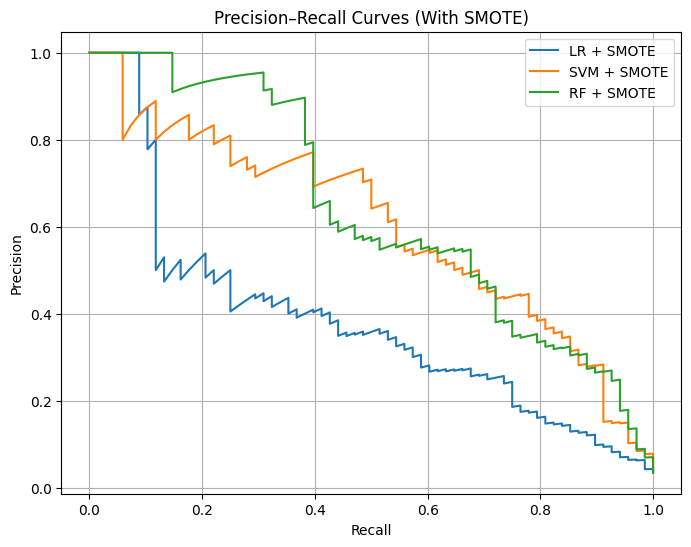

In [34]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for name, model in models_smote.items():
    y_scores = model.predict_proba(X_test)[:, 1]
    prec, rec, _ = precision_recall_curve(y_test, y_scores)
    plt.plot(rec, prec, label=name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves (With SMOTE)")
plt.legend()
plt.grid(True)
plt.show()


In [37]:
from sklearn.metrics import average_precision_score

for name, model in models_smote.items():
    y_scores = model.predict_proba(X_test)[:, 1]
    ap = average_precision_score(y_test, y_scores)
    print(f"{name} - Average Precision: {ap:.4f}")

LR + SMOTE - Average Precision: 0.3845
SVM + SMOTE - Average Precision: 0.6033
RF + SMOTE - Average Precision: 0.6363


# Hyperparameter Tuning

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score

# Parameter grid (optimized for AP and imbalanced data)
param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None,'balanced', 'balanced_subsample']
}


grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='average_precision',
    cv=5,
    n_jobs=-1
)


grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Average Precision:", grid.best_score_)

# Test set evaluation
best_rf = grid.best_estimator_
y_scores = best_rf.predict_proba(X_test_scaled)[:, 1]
test_ap = average_precision_score(y_test, y_scores)

print(f"Test Average Precision: {test_ap:.4f}")

Best Parameters: {'class_weight': None, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Average Precision: 0.8336496411604823
Test Average Precision: 0.8478


# Model Evaluation

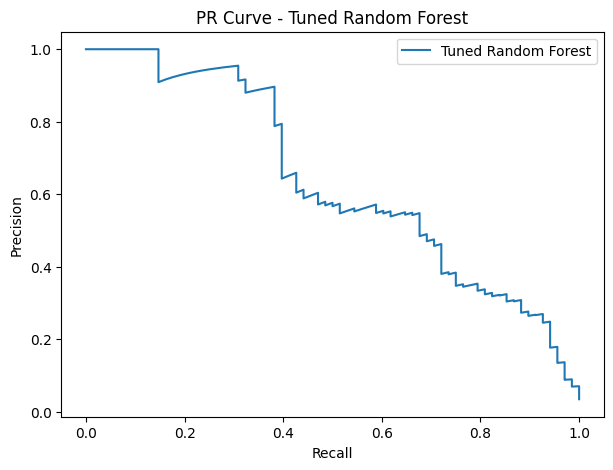

In [48]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    max_features=None,
    min_samples_split=2,
    min_samples_leaf=2,
    class_weight=None
)

best_rf.fit(X_train_scaled, y_train)

y_scores = best_rf.predict_proba(X_test_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(7,5))
plt.plot(rec, prec, label='Tuned Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve - Tuned Random Forest')
plt.legend()
plt.savefig("best_rf.png")
plt.show()

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.86      0.74      0.79        68

    accuracy                           0.99      2000
   macro avg       0.93      0.87      0.89      2000
weighted avg       0.99      0.99      0.99      2000



In [50]:


desired_recall = 0.8

# thresholds array is length len(precision)-1, so we exclude last recall point
idxs = np.where(recall[:-1] >= desired_recall)[0]

if len(idxs) == 0:
    print("Desired recall not achievable, consider lowering recall target.")
    threshold = 0.5  # default
else:
    chosen_idx = idxs[-1]  # last index meeting desired recall
    threshold = thresholds[chosen_idx]

print(f"Chosen threshold for recall >= {desired_recall}: {threshold:.4f}")

Chosen threshold for recall >= 0.8: 0.2235


In [45]:
y_pred_custom = (y_scores >= threshold).astype(int)
print(classification_report(y_test, y_pred_custom, digits=3))
average_precision_score(y_test, y_pred_custom)

              precision    recall  f1-score   support

           0      0.993     0.985     0.989      1932
           1      0.655     0.809     0.724        68

    accuracy                          0.979      2000
   macro avg      0.824     0.897     0.856      2000
weighted avg      0.982     0.979     0.980      2000



0.5360868347338935

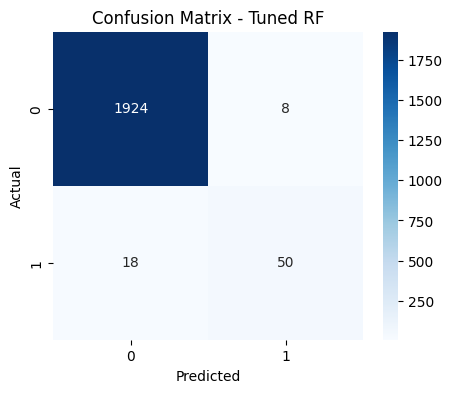

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = best_rf.predict(X_test_scaled)

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Tuned RF')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

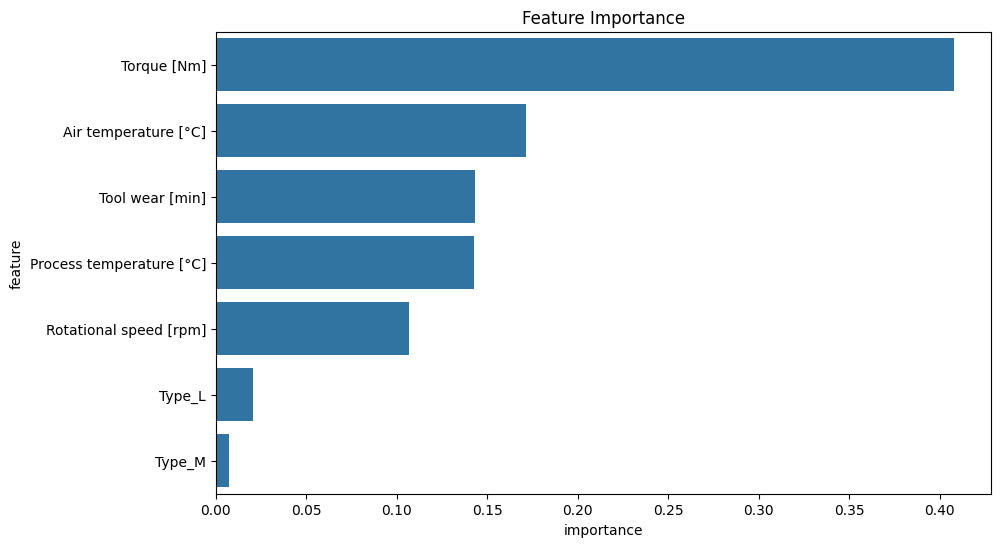

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

importances = best_rf.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title("Feature Importance")
plt.savefig('importance.png')